In [63]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [64]:
day_df = pd.read_csv('usage_by_weather.csv')
day_df

,Unnamed: 0.1,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [65]:
day_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [66]:
day_df1 = day_df.drop(columns=['demand_max(Wh)'])
day_df1

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"12,149,583.10"


In [67]:
day_df.info()
day_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   demand_max(Wh)  730 non-null    object 
 10  usage(kWh)      730 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   mo

In [68]:
day_df['demand_max(Wh)'] = day_df['demand_max(Wh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [69]:
day_df['usage(kWh)'] = day_df['usage(kWh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [70]:
day_df1['usage(kWh)'] = day_df1['usage(kWh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [71]:
day_df.info()
day_df['usage(kWh)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   demand_max(Wh)  730 non-null    float64
 10  usage(kWh)      730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


0      11154070.87
1      10820313.94
2      10577876.27
3      11410542.58
4      11097614.74
          ...     
725     9442942.40
726     9679363.18
727    11754265.48
728    12149583.10
729    11472992.97
Name: usage(kWh), Length: 730, dtype: float64

In [72]:
day_df.isnull().sum()

year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
customer          0
demand_max(Wh)    0
usage(kWh)        0
dtype: int64

In [73]:
day_df.rename(columns={'demand_max(Wh)' : 'wh', 'usage(kWh)' : 'kwh'}, inplace=True)

In [74]:
day_df1.rename(columns={'usage(kWh)' : 'kwh'}, inplace=True)

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   wh              730 non-null    float64
 10  kwh             730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


In [76]:
# day_df.to_csv('usage_by_weather2.csv')

In [77]:
col_day_df = day_df.columns
col_day_df

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh', 'kwh'],
      dtype='object')

Text(0.5, 1.0, '날씨와 전력 상관관계')

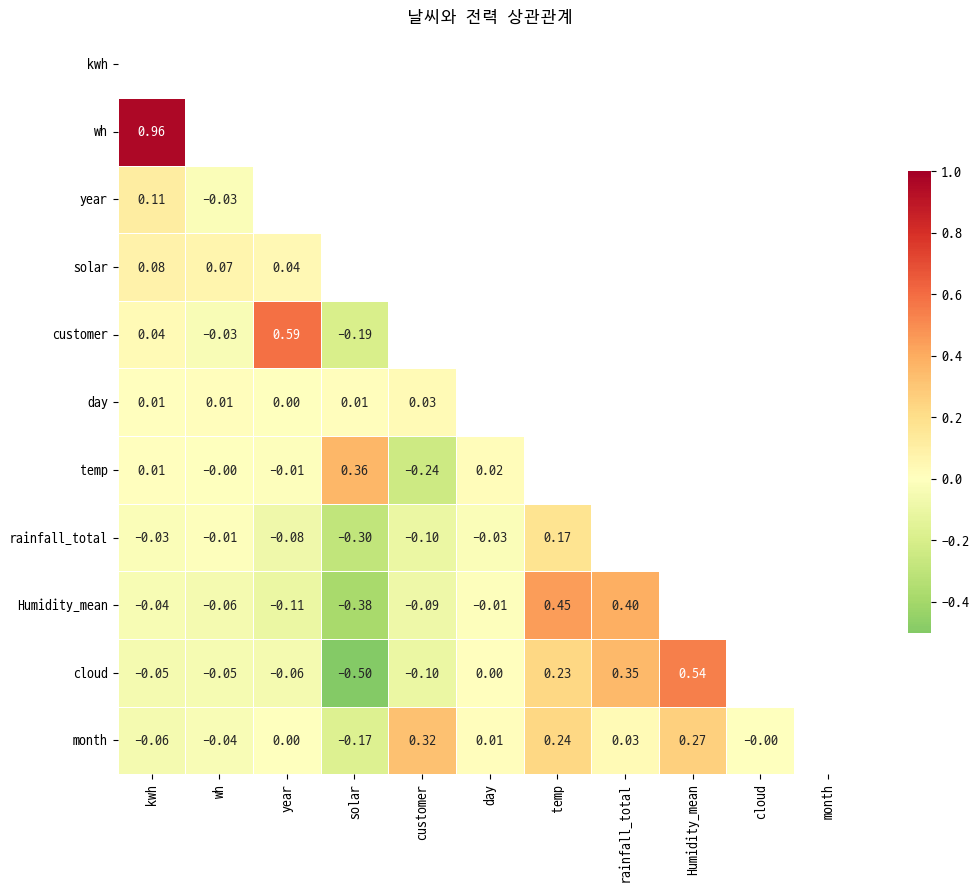

In [78]:

kw_matrix = day_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력 상관관계")

In [79]:
day_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   kwh             730 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 57.2 KB


Text(0.5, 1.0, '날씨와 전력 상관관계')

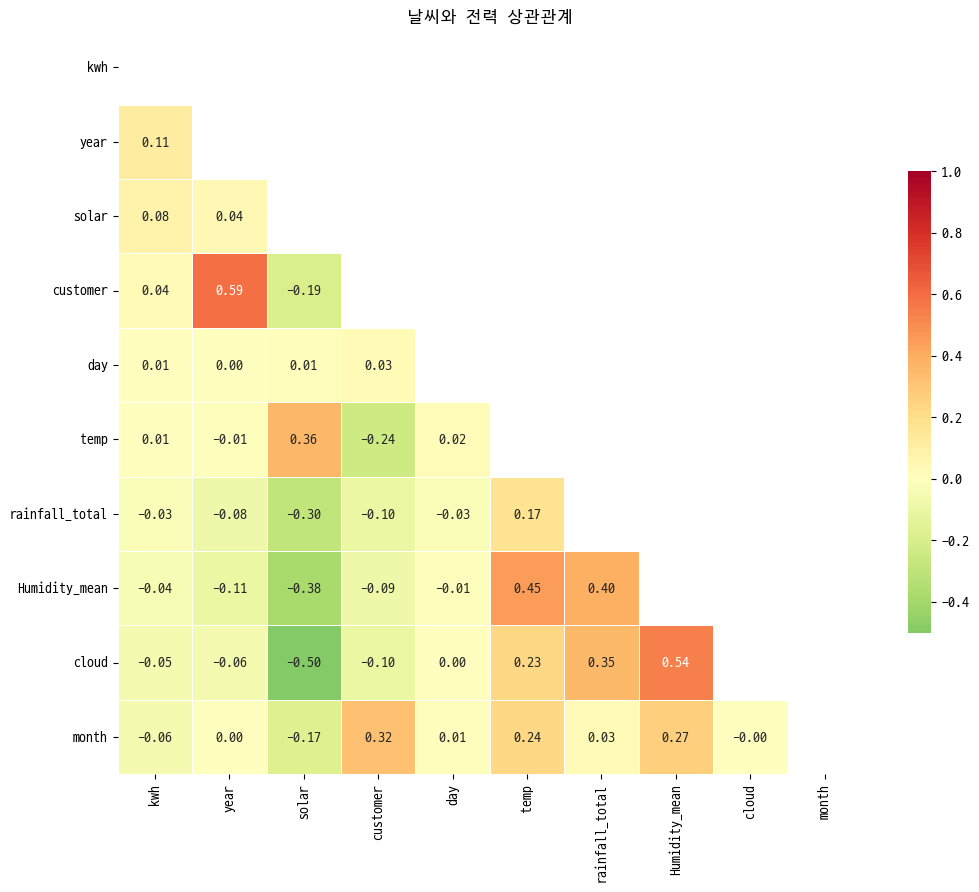

In [80]:
kw_matrix = day_df1.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력 상관관계")

## 결론 날씨와 전력은 상관관계가 거의 없다

In [81]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [82]:
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [83]:
day_df_corr = day_df.corr()
day_df_corr_sort = day_df_corr.sort_values('kwh', ascending=False)
day_df_corr_sort.head(10)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
kwh,1.134049e-01,-5.988557e-02,6.852874e-03,0.006488,-0.053380,-0.025037,-0.044401,0.081395,0.037154,0.963447,1.000000
wh,-2.557046e-02,-3.702866e-02,1.155362e-02,-0.001221,-0.050187,-0.014554,-0.055083,0.066058,-0.034775,1.000000,0.963447
year,1.000000e+00,7.923551e-13,9.339728e-14,-0.014896,-0.056904,-0.082066,-0.106679,0.041920,0.593909,-0.025570,0.113405
solar,4.191976e-02,-1.712911e-01,8.487703e-03,0.363903,-0.502836,-0.295780,-0.381615,1.000000,-0.194289,0.066058,0.081395
customer,5.939094e-01,3.194481e-01,3.432629e-02,-0.243509,-0.100264,-0.100059,-0.091347,-0.194289,1.000000,-0.034775,0.037154
day,9.339728e-14,1.189318e-02,1.000000e+00,0.018880,0.002274,-0.026867,-0.012421,0.008488,0.034326,0.011554,0.006853
temp,-1.489575e-02,2.364771e-01,1.888007e-02,1.000000,0.234163,0.173773,0.449717,0.363903,-0.243509,-0.001221,0.006488
rainfall_total,-8.206610e-02,3.336828e-02,-2.686715e-02,0.173773,0.348429,1.000000,0.395061,-0.295780,-0.100059,-0.014554,-0.025037
Humidity_mean,-1.066792e-01,2.661744e-01,-1.242073e-02,0.449717,0.540440,0.395061,1.000000,-0.381615,-0.091347,-0.055083,-0.044401
cloud,-5.690377e-02,-2.294342e-03,2.274415e-03,0.234163,1.000000,0.348429,0.540440,-0.502836,-0.100264,-0.050187,-0.053380


In [84]:
day_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh', 'kwh'],
      dtype='object')

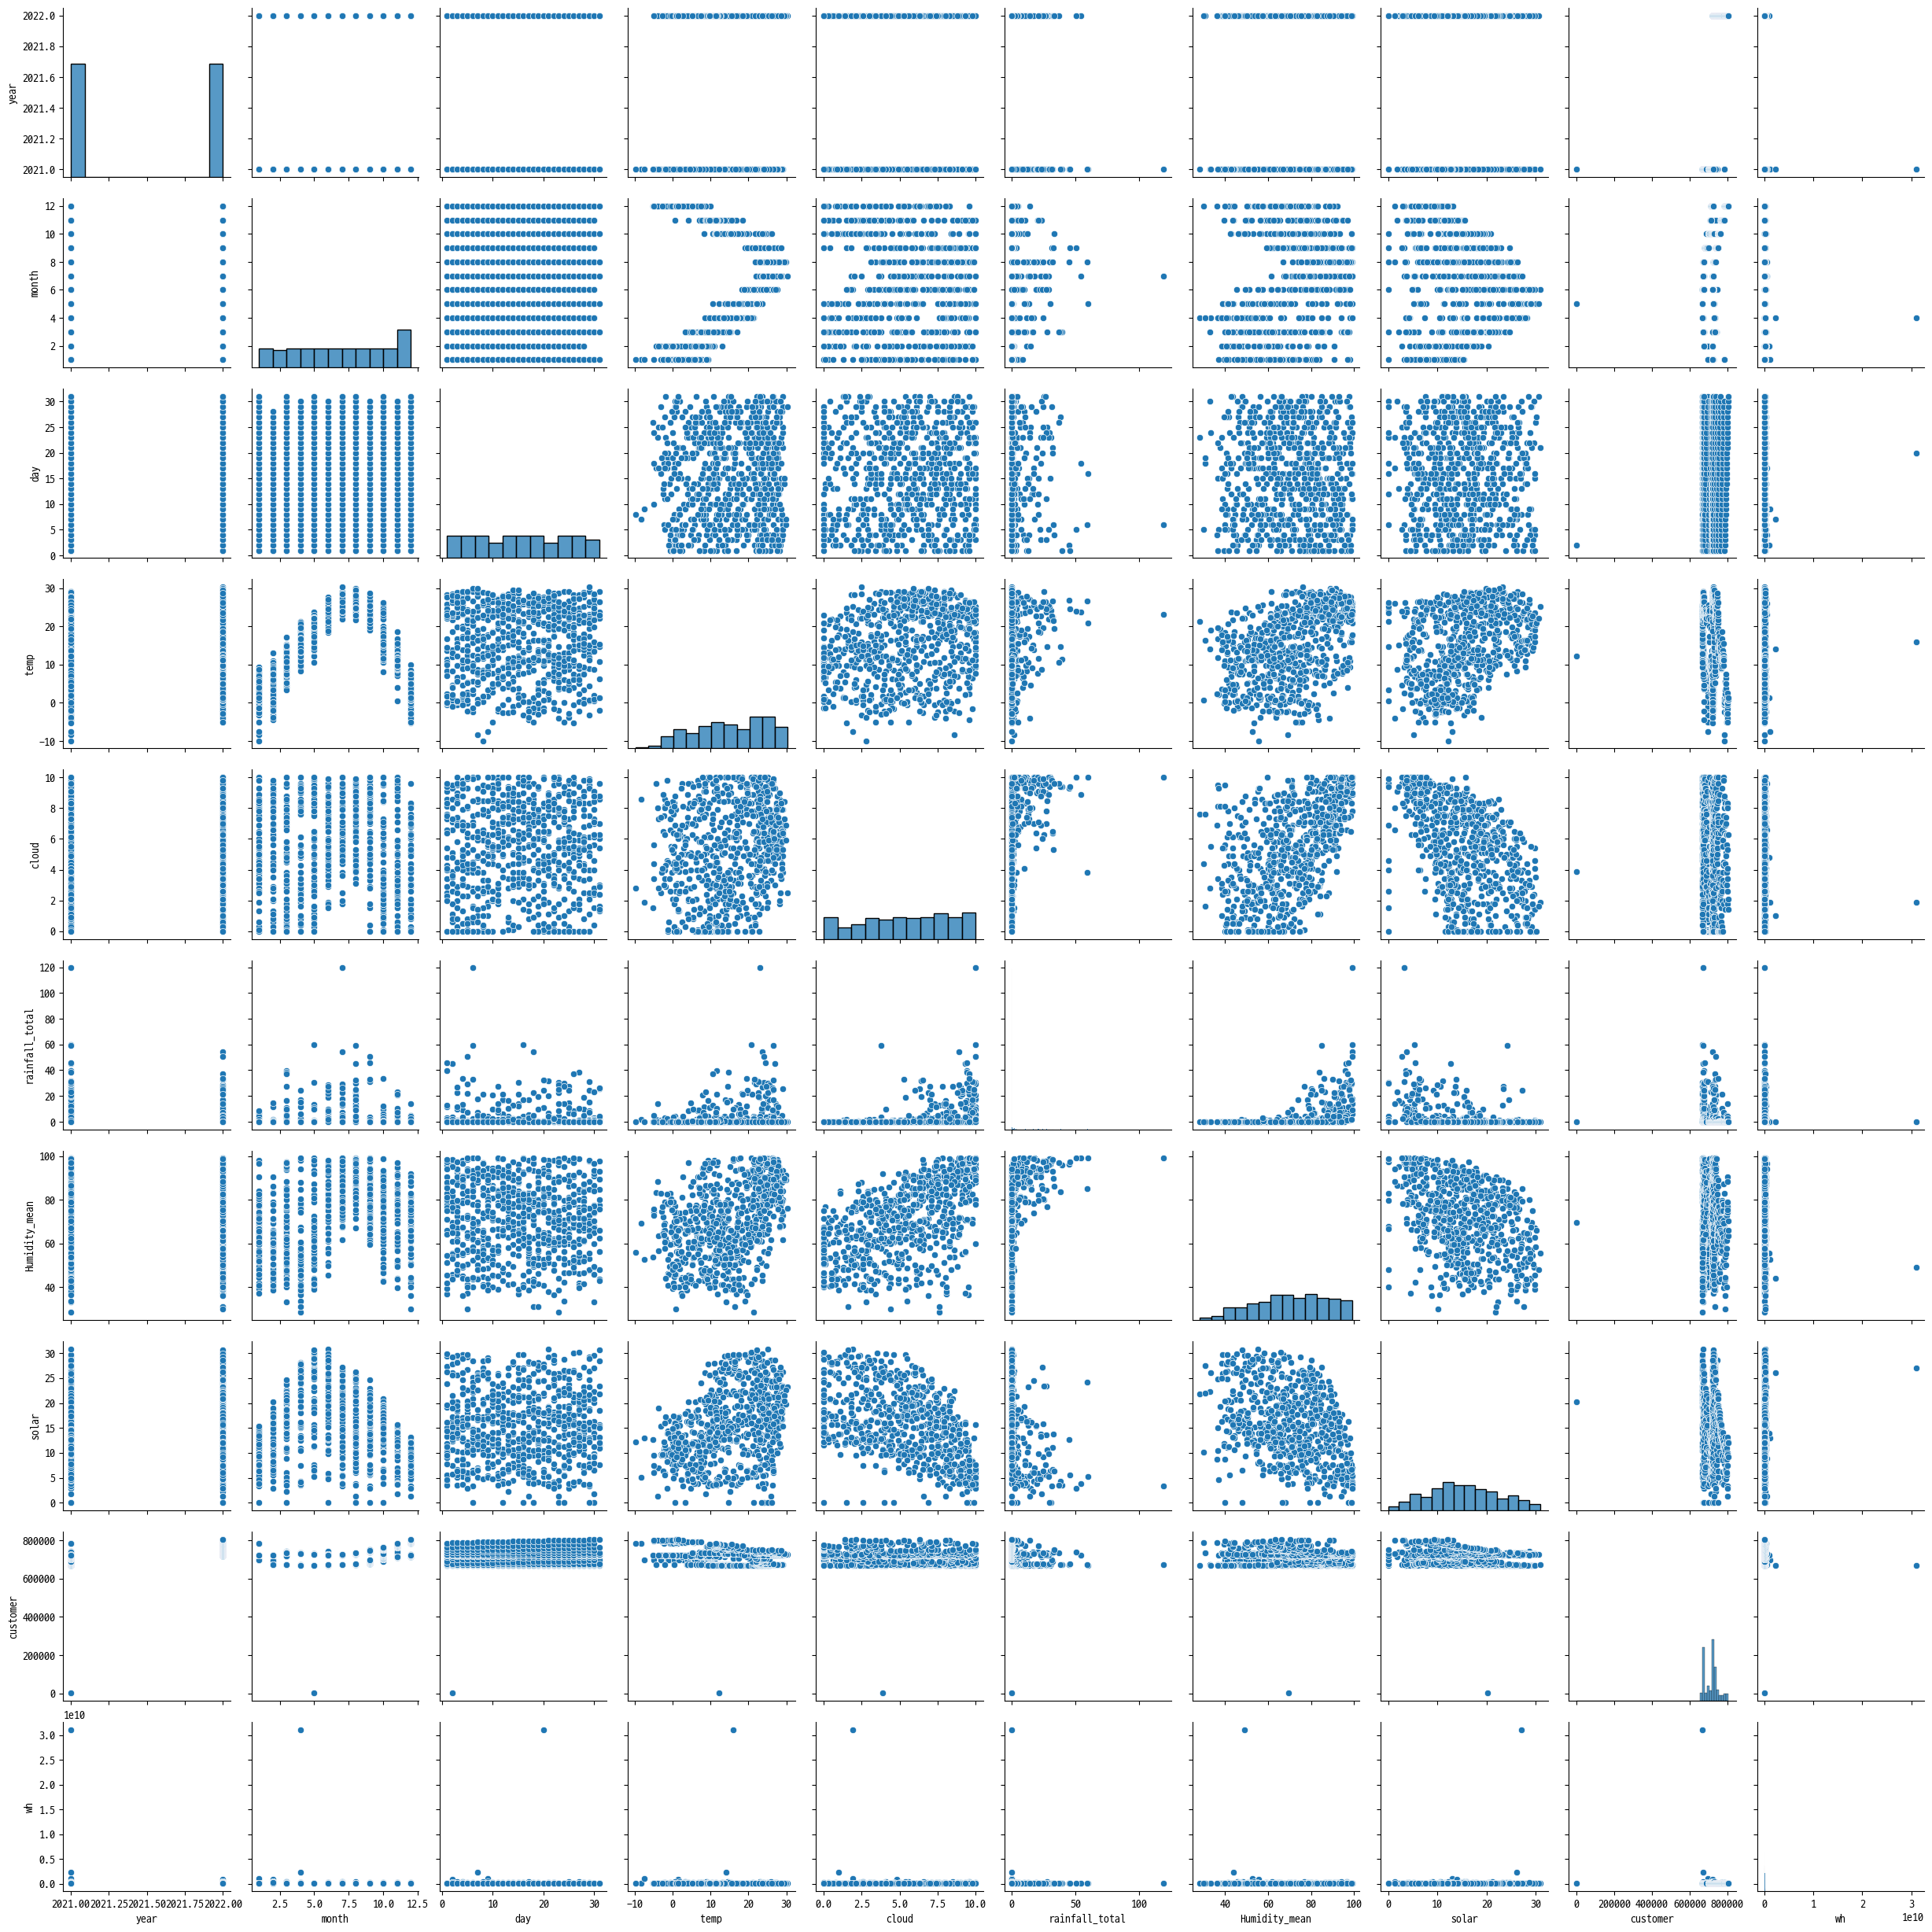

In [85]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh']
sns.pairplot(day_df[cols])
plt.show()

In [86]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh']
X_train_pre = day_df[cols_train]
y = day_df['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [87]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 30)                330       
                                                                 
 dense_10 (Dense)            (None, 40)                1240      
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=400)

modelpath = 'kw_day_weather2.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 11ms/step - loss: 1671412964130816.0000 - val_loss: 217224530886656.0000
Epoch 2/4000
14/14 [==============================] - 0s 4ms/step - loss: 440821652389888.0000 - val_loss: 171900059779072.0000
Epoch 3/4000
14/14 [==============================] - 0s 2ms/step - loss: 441638233047040.0000 - val_loss: 174596208721920.0000
Epoch 4/4000
14/14 [==============================] - 0s 2ms/step - loss: 185498949648384.0000 - val_loss: 185926516998144.0000
Epoch 5/4000
14/14 [==============================] - 0s 2ms/step - loss: 189211814658048.0000 - val_loss: 191125709127680.0000
Epoch 6/4000
14/14 [==============================] - 0s 2ms/step - loss: 192799152537600.0000 - val_loss: 186592035602432.0000
Epoch 7/4000
14/14 [==============================] - 0s 2ms/step - loss: 188748880936960.0000 - val_loss: 185849408913408.0000
Epoch 8/4000
14/14 [==============================] - 0s 2ms/step - loss: 186864262709248.0000 - val_l

In [90]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)


5/5 [==============================] - 0s 920us/step
실제 전력 : 13290844.74, 예상전력 : 16257779.00
실제 전력 : 11764084.23, 예상전력 : 12384077.00
실제 전력 : 11632766.19, 예상전력 : 12204792.00
실제 전력 : 10827504.23, 예상전력 : 11114489.00
실제 전력 : 16772176.25, 예상전력 : 15462101.00
실제 전력 : 16185816.63, 예상전력 : 16048173.00
실제 전력 : 15092216.24, 예상전력 : 15086300.00
실제 전력 : 12458424.04, 예상전력 : 17534744.00
실제 전력 : 20888978.03, 예상전력 : 18781616.00
실제 전력 : 11950043.23, 예상전력 : 12904882.00
실제 전력 : 11386415.50, 예상전력 : 13034007.00
실제 전력 : 17271923.61, 예상전력 : 16338397.00
실제 전력 : 12106760.05, 예상전력 : 12120739.00
실제 전력 : 11297349.15, 예상전력 : 13169960.00
실제 전력 : 16012656.61, 예상전력 : 16905496.00
실제 전력 : 12589555.05, 예상전력 : 15144257.00
실제 전력 : 13191472.14, 예상전력 : 13151644.00
실제 전력 : 12964657.26, 예상전력 : 14987597.00
실제 전력 : 16044863.71, 예상전력 : 16345927.00
실제 전력 : 13515733.57, 예상전력 : 16780900.00
실제 전력 : 14319041.74, 예상전력 : 14581259.00
실제 전력 : 11754265.48, 예상전력 : 14114401.00
실제 전력 : 13111226.03, 예상전력 : 15870502.00
실제 전력 : 11663369.59, 예상전력 :

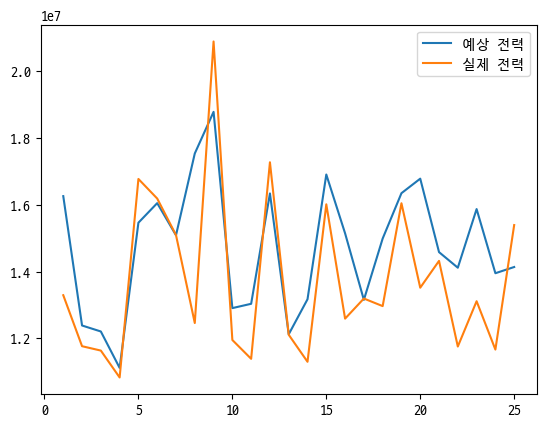

In [91]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()

In [92]:
# from autogluon.tabular import TabularDataset, TabularPredictor

In [93]:
day_df['kwh'].min()

6200904.63

In [94]:
day_df.query("kwh == 6200904.63")

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
273,2021,10,1,22.0,2.5,0.0,88.0,11.15,687167,65960944.46,6200904.63


In [95]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   wh              730 non-null    float64
 10  kwh             730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


In [96]:
def temp_v2(temp):
    temp_v = abs(temp - 22.0)
    return temp_v

In [97]:
day_df['temp_v'] = day_df['temp'].apply(lambda x: temp_v2(x))

In [98]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   wh              730 non-null    float64
 10  kwh             730 non-null    float64
 11  temp_v          730 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 68.6 KB


In [99]:
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh,temp_v
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87,22.6
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94,22.3
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27,22.6
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58,20.8
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40,21.7
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18,22.2
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48,21.3
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10,21.0


In [100]:
day_df2 = day_df.drop(columns='wh')

In [101]:
day_df2.head(2)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,kwh,temp_v
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,11154070.87,22.6
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,10820313.94,22.3


Text(0.5, 1.0, '날씨(온도지수)와 전력 상관관계')

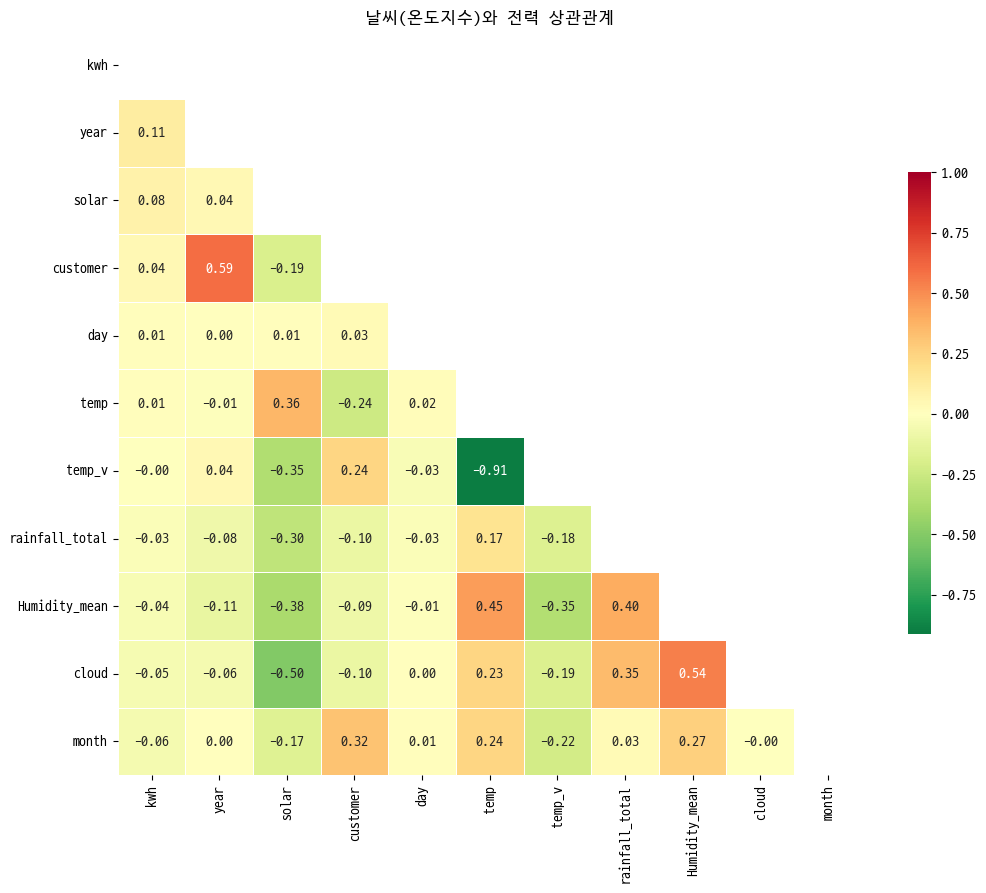

In [102]:
kw_matrix = day_df2.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨(온도지수)와 전력 상관관계")

In [103]:
day_df2_corr = day_df2.corr()
day_df2_corr_sort = day_df2_corr.sort_values('kwh', ascending=False)
day_df2_corr_sort.head(10)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,kwh,temp_v
kwh,1.134049e-01,-5.988557e-02,6.852874e-03,0.006488,-0.053380,-0.025037,-0.044401,0.081395,0.037154,1.000000,-0.002682
year,1.000000e+00,7.923551e-13,9.339728e-14,-0.014896,-0.056904,-0.082066,-0.106679,0.041920,0.593909,0.113405,0.044105
solar,4.191976e-02,-1.712911e-01,8.487703e-03,0.363903,-0.502836,-0.295780,-0.381615,1.000000,-0.194289,0.081395,-0.353159
customer,5.939094e-01,3.194481e-01,3.432629e-02,-0.243509,-0.100264,-0.100059,-0.091347,-0.194289,1.000000,0.037154,0.244013
day,9.339728e-14,1.189318e-02,1.000000e+00,0.018880,0.002274,-0.026867,-0.012421,0.008488,0.034326,0.006853,-0.034162
temp,-1.489575e-02,2.364771e-01,1.888007e-02,1.000000,0.234163,0.173773,0.449717,0.363903,-0.243509,0.006488,-0.913756
temp_v,4.410543e-02,-2.245346e-01,-3.416230e-02,-0.913756,-0.186121,-0.181078,-0.345918,-0.353159,0.244013,-0.002682,1.000000
rainfall_total,-8.206610e-02,3.336828e-02,-2.686715e-02,0.173773,0.348429,1.000000,0.395061,-0.295780,-0.100059,-0.025037,-0.181078
Humidity_mean,-1.066792e-01,2.661744e-01,-1.242073e-02,0.449717,0.540440,0.395061,1.000000,-0.381615,-0.091347,-0.044401,-0.345918
cloud,-5.690377e-02,-2.294342e-03,2.274415e-03,0.234163,1.000000,0.348429,0.540440,-0.502836,-0.100264,-0.053380,-0.186121


In [104]:
day_df2.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'kwh', 'temp_v'],
      dtype='object')

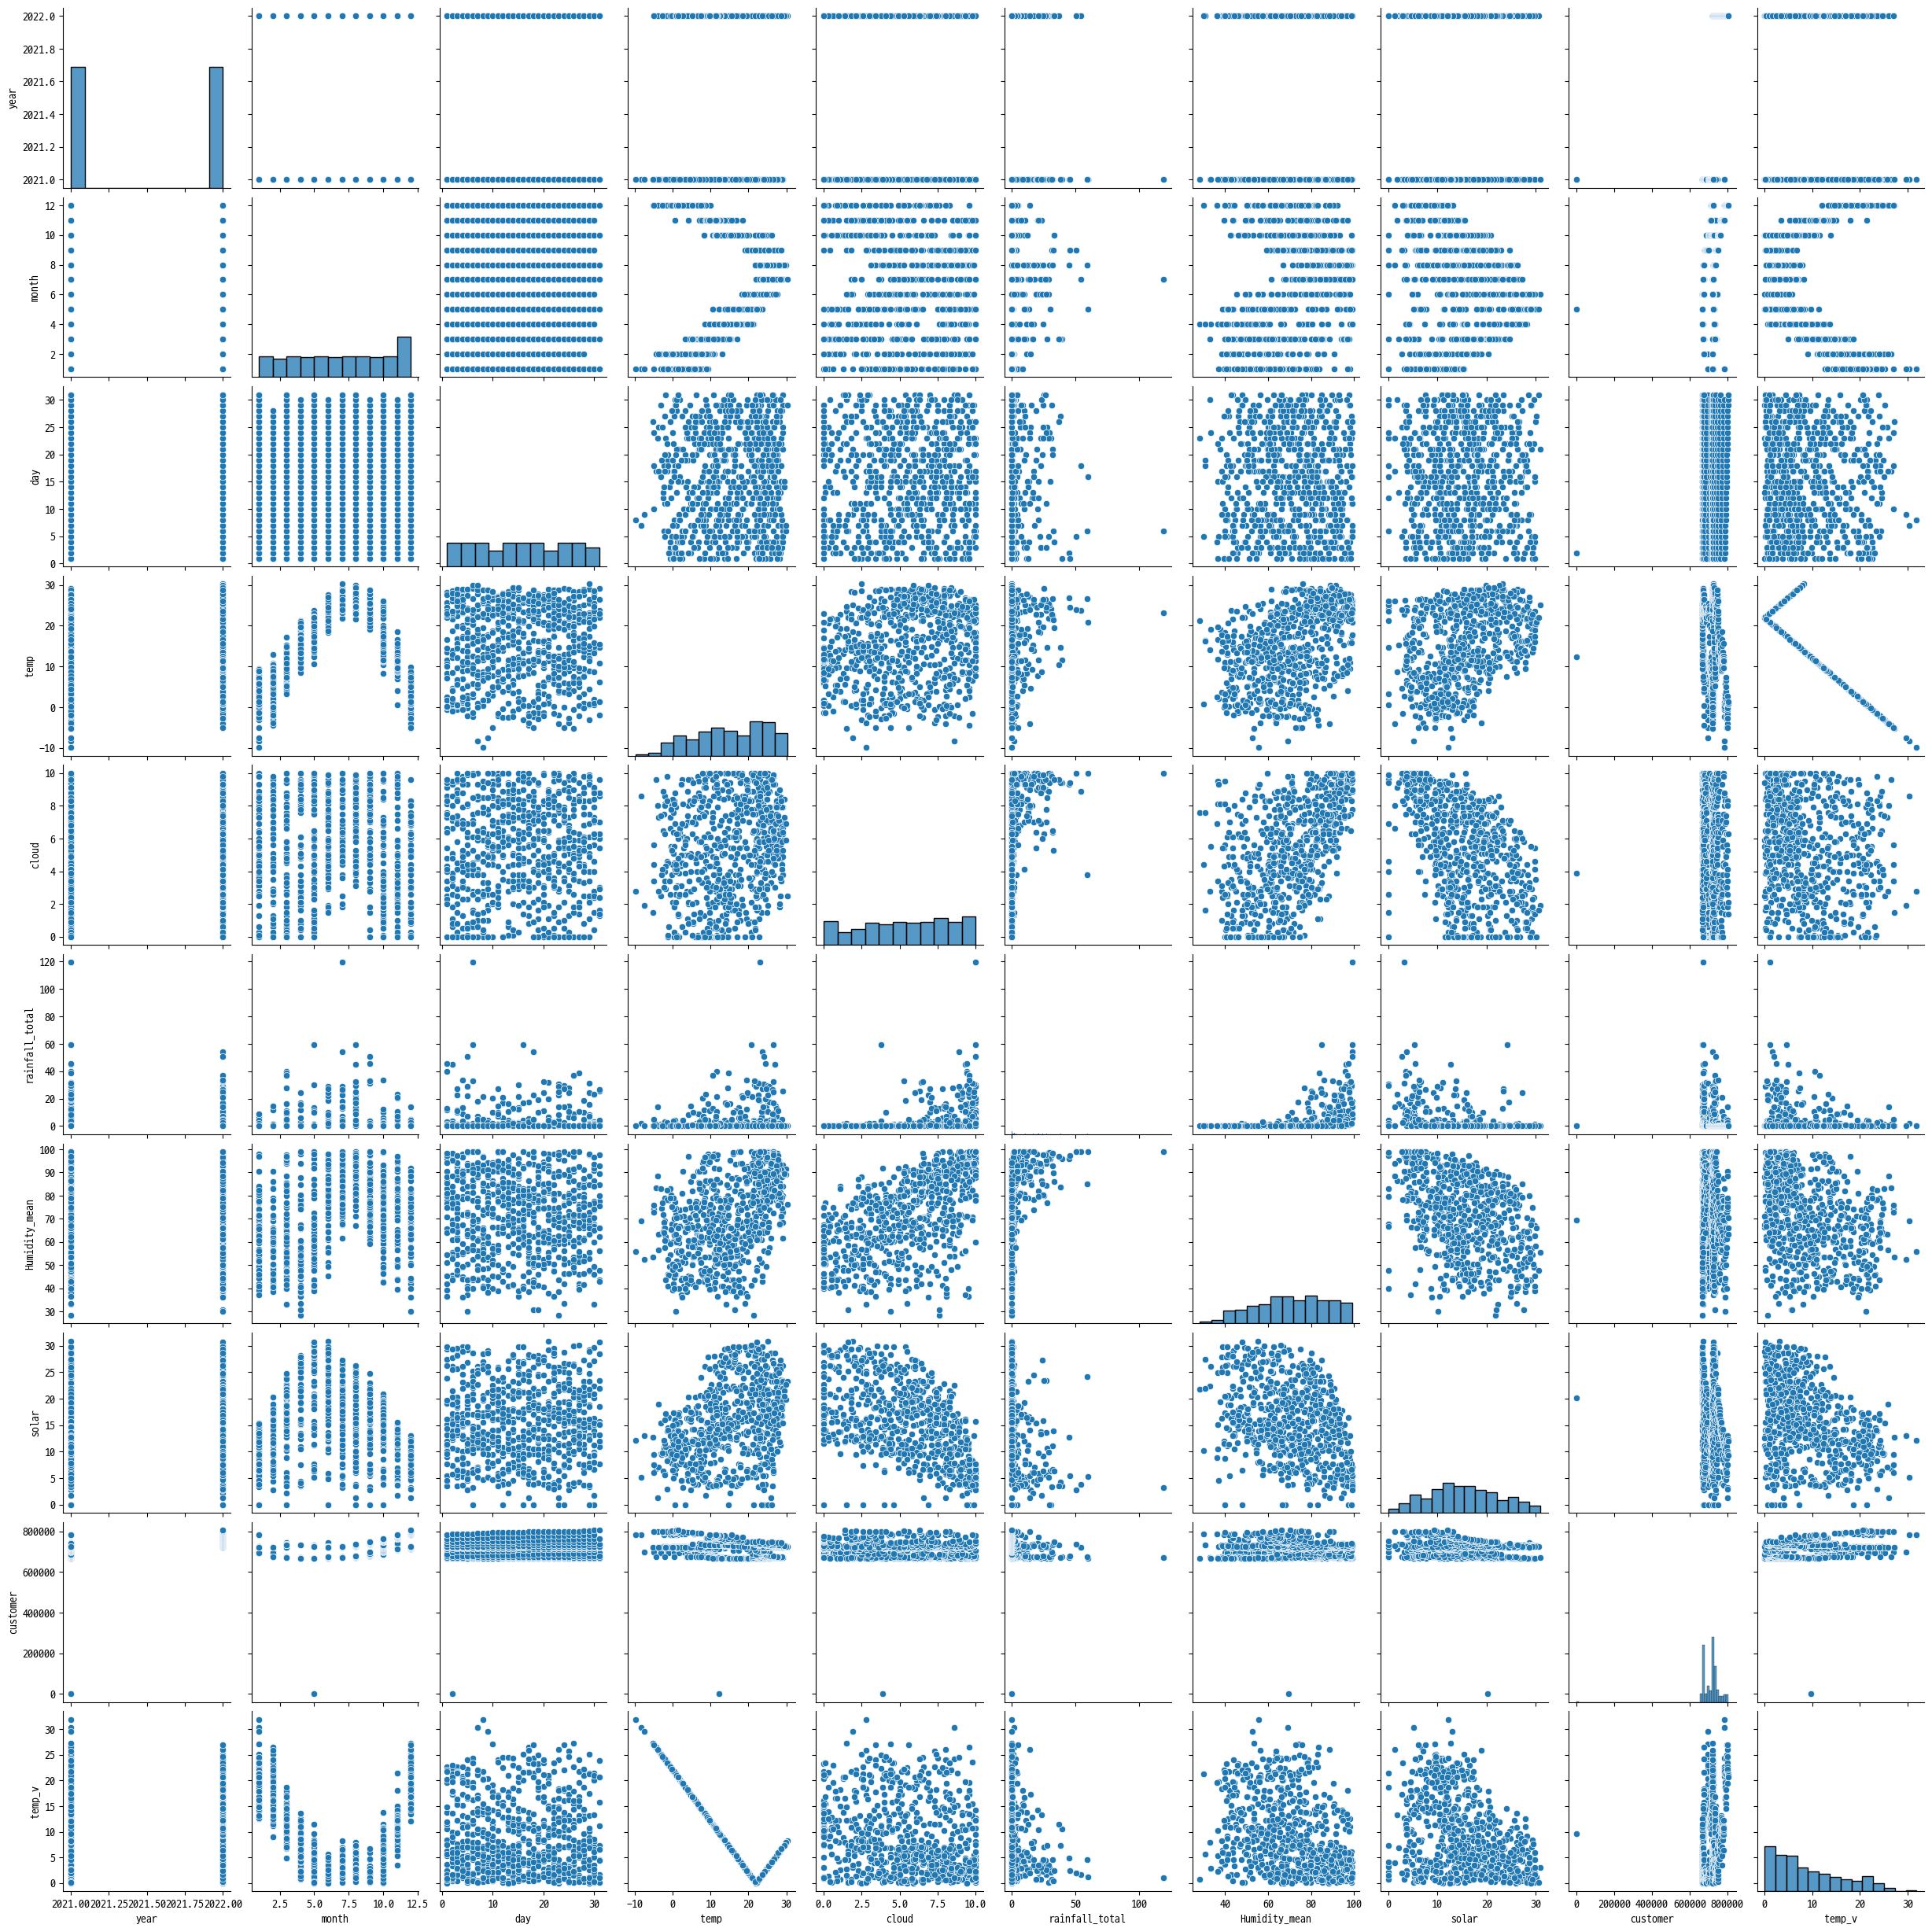

In [105]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'temp_v']
sns.pairplot(day_df2[cols])
plt.show()

In [106]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'temp_v']
X_train_pre = day_df2[cols_train]
y = day_df2['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [107]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 40)                1240      
                                                                 
 dense_15 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [109]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=400)

modelpath = 'kw_day_weather3.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 11ms/step - loss: 467760257695744.0000 - val_loss: 206385056841728.0000
Epoch 2/4000
14/14 [==============================] - 0s 4ms/step - loss: 464987956969472.0000 - val_loss: 203598512259072.0000
Epoch 3/4000
14/14 [==============================] - 0s 4ms/step - loss: 461804782223360.0000 - val_loss: 200180037058560.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 457551992848384.0000 - val_loss: 195432521138176.0000
Epoch 5/4000
14/14 [==============================] - 0s 4ms/step - loss: 451874448736256.0000 - val_loss: 189314004680704.0000
Epoch 6/4000
14/14 [==============================] - 0s 4ms/step - loss: 444367047229440.0000 - val_loss: 181012134887424.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 433837129596928.0000 - val_loss: 169836311216128.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 420081892851712.0000 - val_lo

In [110]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

5/5 [==============================] - 0s 750us/step
실제 전력 : 11128492.40, 예상전력 : 14550802.00
실제 전력 : 15981043.45, 예상전력 : 14939776.00
실제 전력 : 16995721.03, 예상전력 : 15079090.00
실제 전력 : 11095412.99, 예상전력 : 14048840.00
실제 전력 : 12719320.82, 예상전력 : 15060726.00
실제 전력 : 22035589.77, 예상전력 : 15059611.00
실제 전력 : 11312194.49, 예상전력 : 14057966.00
실제 전력 : 17323744.53, 예상전력 : 15247897.00
실제 전력 : 15010440.49, 예상전력 : 15374198.00
실제 전력 : 15165769.45, 예상전력 : 16406794.00
실제 전력 : 12136136.59, 예상전력 : 16324096.00
실제 전력 : 10560015.07, 예상전력 : 16669142.00
실제 전력 : 12719199.07, 예상전력 : 14061110.00
실제 전력 : 14338019.24, 예상전력 : 14040548.00
실제 전력 : 10906039.21, 예상전력 : 14107230.00
실제 전력 : 14796992.57, 예상전력 : 15041980.00
실제 전력 : 23674510.63, 예상전력 : 15330896.00
실제 전력 : 11440269.04, 예상전력 : 13929619.00
실제 전력 : 13829337.81, 예상전력 : 15913614.00
실제 전력 : 16640352.98, 예상전력 : 15160574.00
실제 전력 : 11103412.18, 예상전력 : 16290070.00
실제 전력 : 13792130.65, 예상전력 : 15819144.00
실제 전력 : 9374466.34, 예상전력 : 13951014.00
실제 전력 : 14071416.64, 예상전력 : 

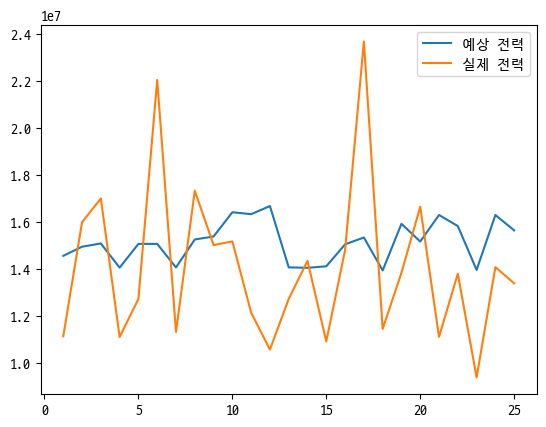

In [111]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()

In [112]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [113]:
day_df = pd.read_csv('usage_by_weather2.csv')
day_df

,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [114]:
day_df.drop(columns=['Unnamed: 0', 'customer', 'wh'], inplace=True)

In [115]:
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,11097614.74
...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,12149583.10


In [116]:
day_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'kwh'],
      dtype='object')

In [117]:

X_train_pre = day_df
y = day_df['kwh'].values
# X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)
train = X_train_pre.iloc[:-200]
test = X_train_pre.iloc[-200:]



In [118]:
train

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,11097614.74
...,...,...,...,...,...,...,...,...,...
525,2022,6,10,22.4,5.5,0.0,72.3,20.67,16633358.06
526,2022,6,11,23.0,4.3,0.0,77.6,25.65,17684223.70
527,2022,6,12,22.6,5.8,0.1,85.6,16.49,18776373.50
528,2022,6,13,22.0,9.4,0.0,71.0,12.59,17767854.30


autogluon TabularPredictor사용 최적화 모델 찾기 

In [119]:
predictor = TabularPredictor(label='kwh').fit(train)

No path specified. Models will be saved in: "AutogluonModels\ag-20230330_051552\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230330_051552\"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    530
Train Data Columns: 8
Label Column: kwh
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (33619790.7, 6200904.63, 14125980.70157, 3988667.59129)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5161.21 MB
	Train Data (

# 최적화 모델은 WeightedEnsemble_L2

In [120]:
train1 = test['kwh'].reset_index(drop=True)

In [121]:
train1

0      10835209.96
1      15323802.67
2      19557199.21
3      16788026.37
4      15048708.62
          ...     
195     9442942.40
196     9679363.18
197    11754265.48
198    12149583.10
199    11472992.97
Name: kwh, Length: 200, dtype: float64

In [122]:
test_preds = predictor.predict(test)
test_preds.reset_index(drop=True, inplace=True)

In [123]:
test_preds

0      16254700.0
1      16170191.0
2      16439096.0
3      16195462.0
4      16066857.0
          ...    
195    16979904.0
196    16762208.0
197    16599369.0
198    16496852.0
199    16986306.0
Name: kwh, Length: 200, dtype: float32

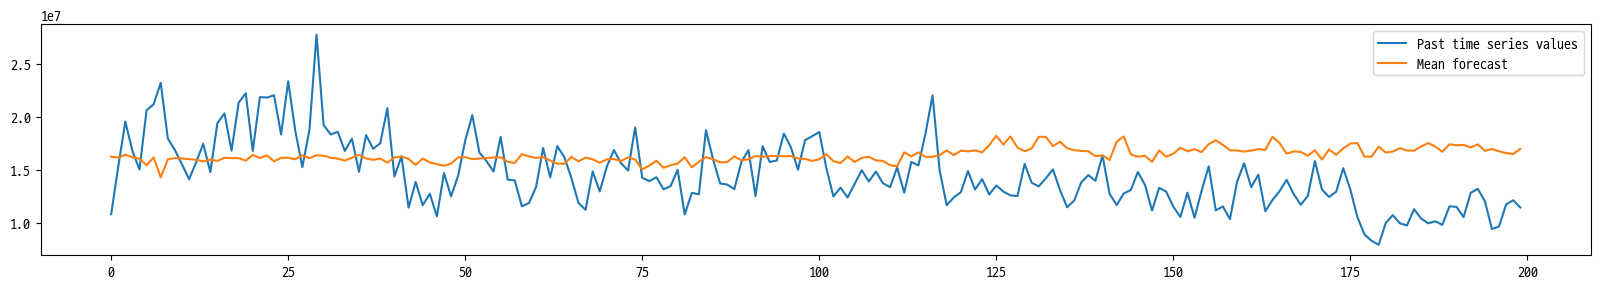

In [124]:
plt.figure(figsize=(20, 3))

plt.plot(train1, label="Past time series values")
plt.plot(test_preds, label="Mean forecast")

plt.legend();

In [125]:
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,11097614.74
...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,12149583.10
